# A Visual Look at the Nobel Prize Winners
    Some Questions to consider:
        - Gender breakdown
        - Category breakdown
        - People who have one more than once
        - Country Breakdown
        - Canadians
        - Literature since I love literature
          

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Quick look at my dataset

In [3]:
df = pd.read_csv('nobel.csv')

display(df.head())
display(df.tail())
display(df.sample(5))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
910,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,930,Individual,J. Michael Kosterlitz,1943-06-22,Aberdeen,United Kingdom,Male,Brown University,"Providence, RI",United States of America,NaN,NaN,NaN


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
422,1972,Medicine,The Nobel Prize in Physiology or Medicine 1972,"""for their discoveries concerning the chemical...",1/2,398,Individual,Gerald M. Edelman,1929-07-01,"New York, NY",United States of America,Male,Rockefeller University,"New York, NY",United States of America,2014-05-17,"La Jolla, CA",United States of America
812,2008,Peace,The Nobel Peace Prize 2008,"""for his important efforts, on several contine...",1/1,833,Individual,Martti Ahtisaari,1937-06-23,Viipuri (Vyborg),Finland,Male,NaN,NaN,NaN,NaN,NaN,NaN
31,1906,Chemistry,The Nobel Prize in Chemistry 1906,"""in recognition of the great services rendered...",1/1,165,Individual,Henri Moissan,1852-09-28,Paris,France,Male,Sorbonne University,Paris,France,1907-02-20,Paris,France
556,1985,Medicine,The Nobel Prize in Physiology or Medicine 1985,"""for their discoveries concerning the regulati...",1/2,432,Individual,Michael S. Brown,1941-04-13,"New York, NY",United States of America,Male,University of Texas Southwestern Medical Cente...,"Dallas, TX",United States of America,NaN,NaN,NaN
164,1932,Medicine,The Nobel Prize in Physiology or Medicine 1932,"""for their discoveries regarding the functions...",1/2,323,Individual,Sir Charles Scott Sherrington,1857-11-27,London,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,1952-03-04,Eastbourne,United Kingdom


In [4]:
display(df.shape)
df.info()

(911, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


### Cleaning up:
    There's a lot of stuff in the dataset that I don't really care about. Organization and other org columns for example. Laureate_id seems pretty useless to me, the id is irrelevant in terms of what I'm trying to capture in the dataset. I'll remove all those columns I don't need for my analysis and store that into a new df called nobel incase I do want to go back to my previous one of df. At a first glance, prize and category seem pretty useless as a lot of the information intersect. There are slight differences so I'll keep that.

In [103]:
print(list(df))

columns_to_drop = ['laureate_id','organization_name', 'organization_city', 'organization_country','laureate_type']

nobel = df.drop(columns_to_drop,axis =1)

nobel.head()

['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex', 'organization_name', 'organization_city', 'organization_country', 'death_date', 'death_city', 'death_country']


,year,category,prize,motivation,prize_share,full_name,birth_date,birth_city,birth_country,sex,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Sully Prudhomme,1839-03-16,Paris,France,Male,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Frédéric Passy,1822-05-20,Paris,France,Male,1912-06-12,Paris,France


### Sex Breakdown:
    Let's take a look at the differences between men and women and the prize winners. See the differences in proportion, which women won the most prizes etc..

Male      836
Female     49
Name: sex, dtype: int64

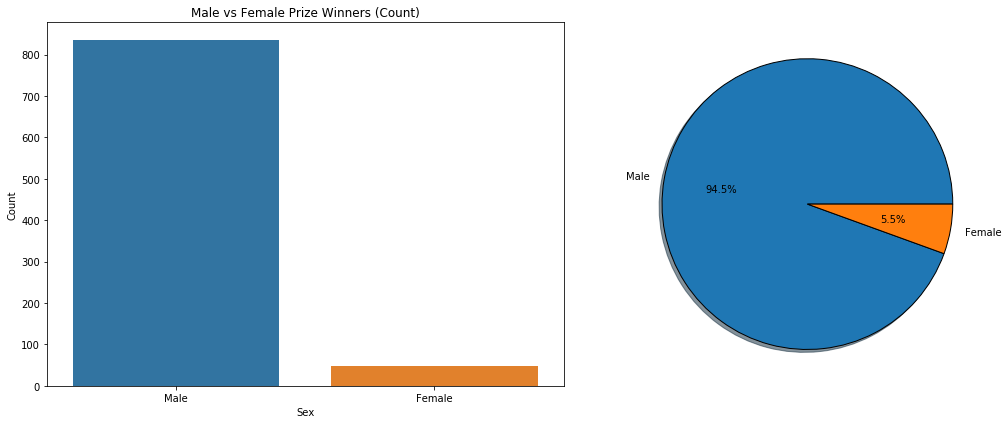

In [7]:
display(nobel['sex'].value_counts())

fig, (ax,ax1) = plt.subplots(ncols =2, nrows=1,figsize = (15,6))

sns.countplot(df['sex'],ax =ax)
ax.set(title ='Male vs Female Prize Winners (Count)',xlabel = 'Sex',ylabel = 'Count')

plt.pie(nobel['sex'].value_counts(),shadow = True,wedgeprops ={'edgecolor':'black'},autopct = '%1.1f%%',
       labels = ['Male','Female'])

plt.tight_layout()
plt.show()

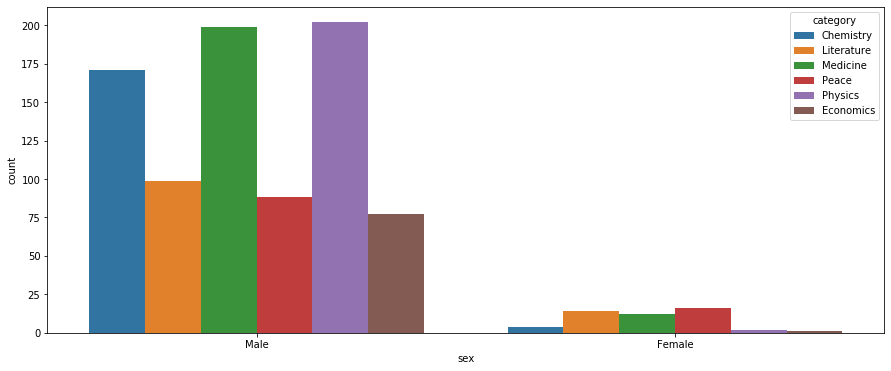

In [8]:
fig, ax = plt.subplots(figsize = (15,6))

sns.countplot(df['sex'],hue = df['category'],ax = ax)

### Sex Analysis:
    There is a huge difference in terms of the number of men who've won versus the number of women. In fact if there's a given nobel prize you would almost assume that it's going to be a man based on the historical data. Regarding the categorical breakdown it seems that women are given the peace prize the most, whereas men get it for physics. 

### Country Breakdown:

    Let's look at which countries win the most nobel prizes. Is there an explanation for that? The award is european in origin so there might be some bias for european countries?

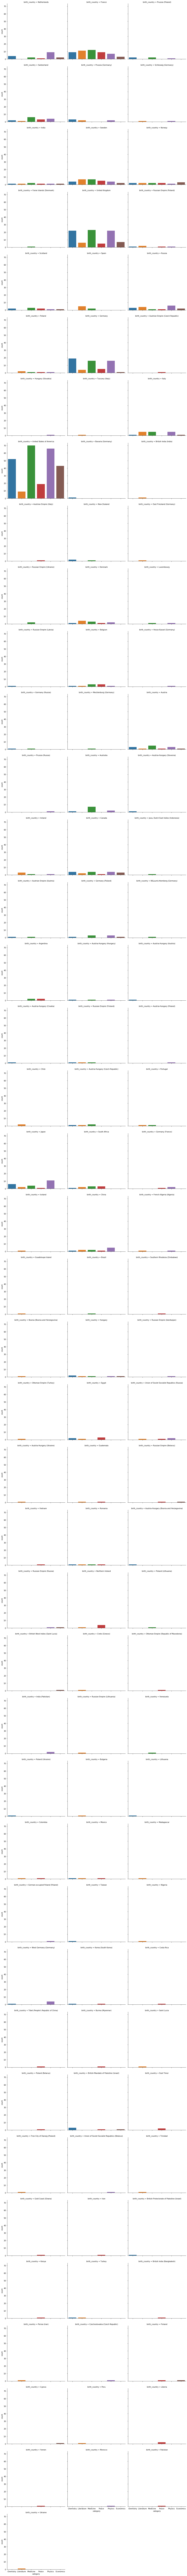

In [167]:
sns.catplot('category',col='birth_country',data=nobel,kind='count',col_wrap=3,estimator=sum)

plt.tight_layout()
plt.show()

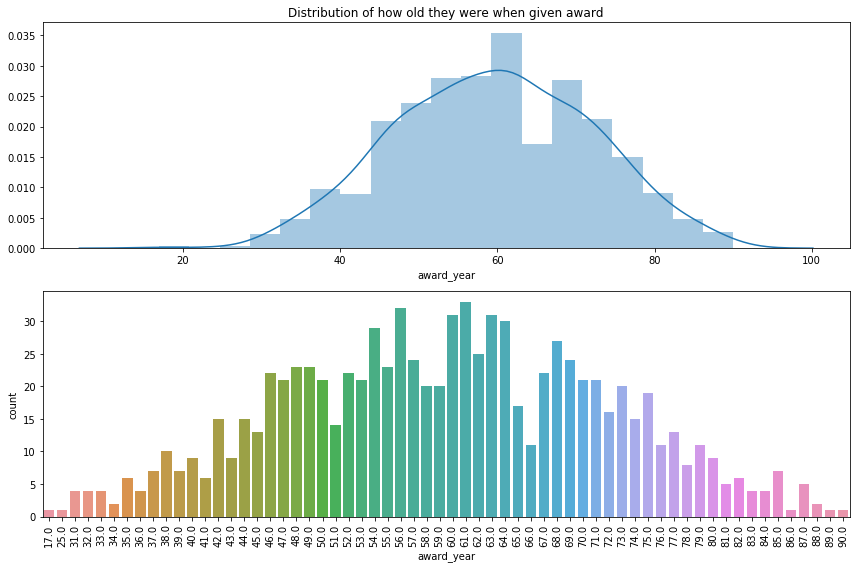

In [108]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['award_year'] = nobel['year']- nobel['birth_date'].dt.year

age_award = nobel['award_year'].dropna().reset_index()

fig,(ax1,ax2) = plt.subplots(nrows =2, ncols =1,figsize = (12,8))

sns.distplot(age_award['award_year'],ax = ax1)
sns.countplot(age_award['award_year'],ax =ax2)

ax1.set(title = 'Distribution of how old they were when given award')

plt.setp(ax2.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

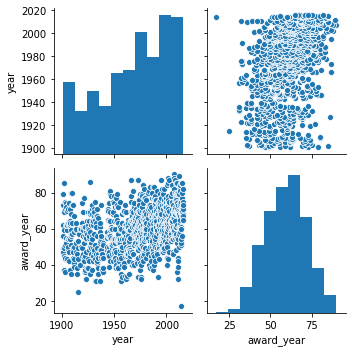

In [140]:
sns.pairplot(nobel)

plt.tight_layout()
plt.show()

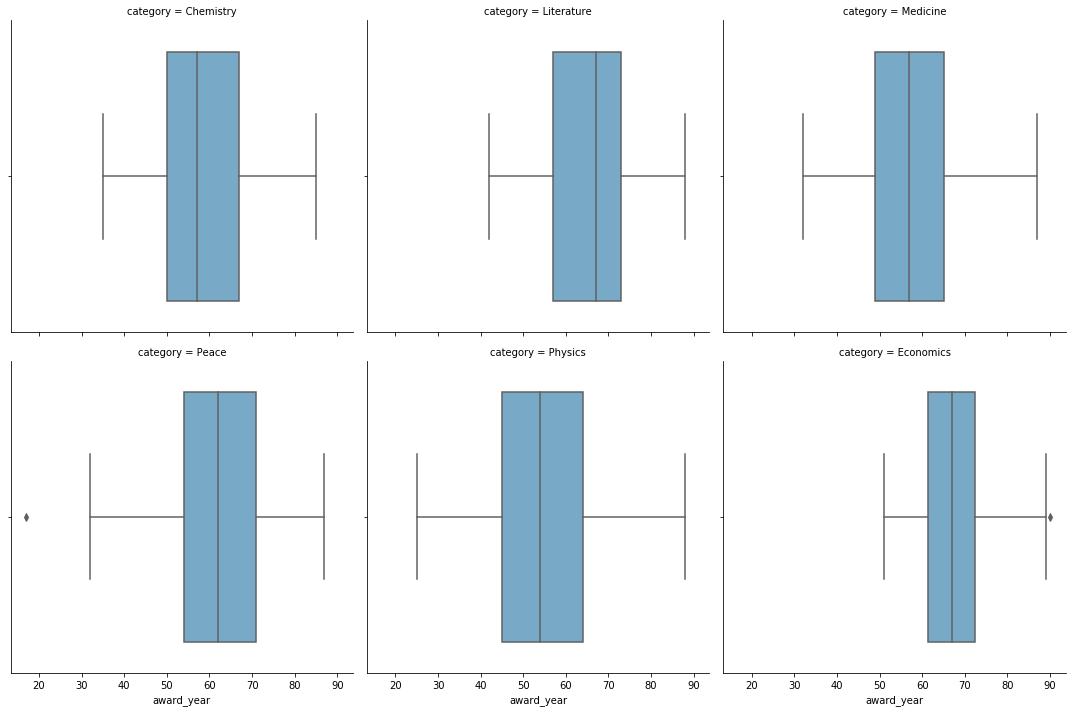

In [162]:
sns.catplot(data=nobel,x='award_year',kind='box',col='category',col_wrap =3,palette = 'Blues')

plt.show()

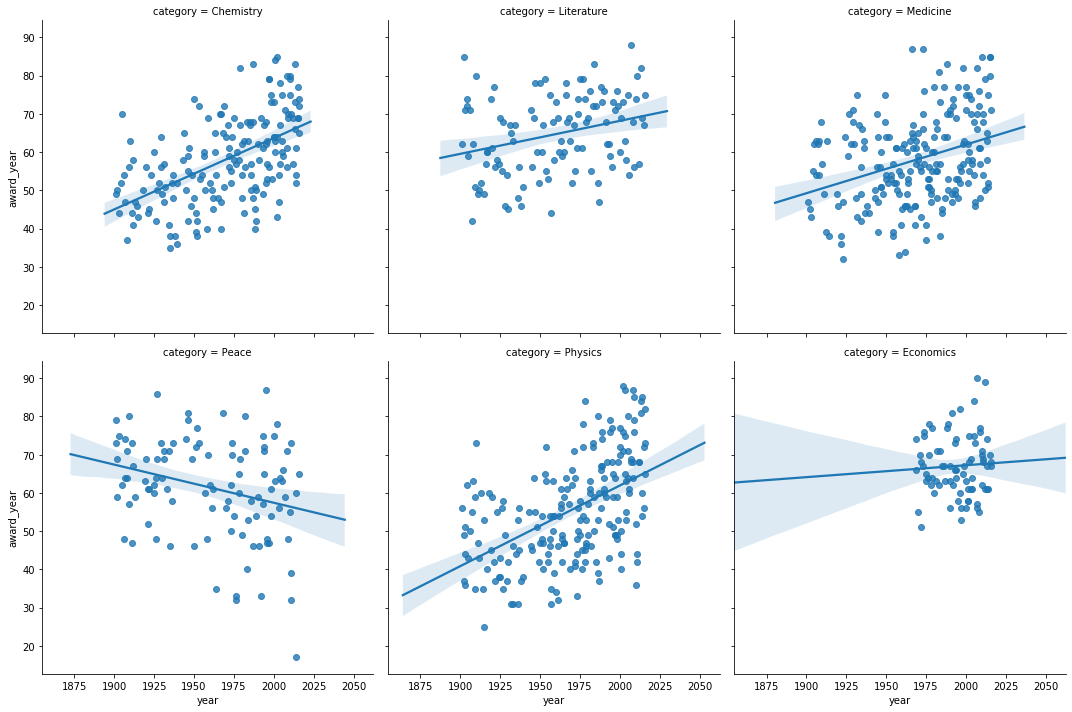

In [172]:
sns.lmplot(data = nobel, x ='year', y= 'award_year',col ='category',col_wrap = 3)

plt.tight_layout()
plt.show()

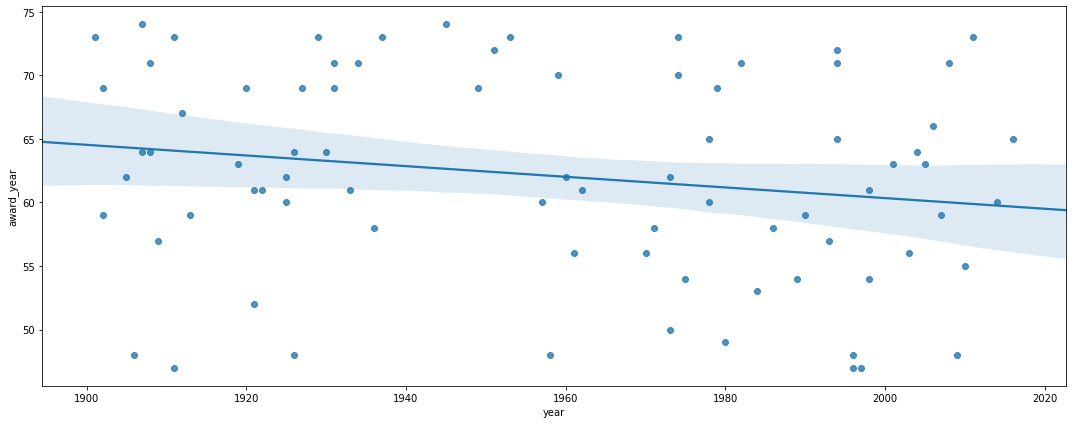

In [200]:
peace = nobel[nobel['category'] == 'Peace']
from scipy import stats

q_low = peace["award_year"].quantile(0.10)
q_hi  = peace["award_year"].quantile(0.90)

df_filtered = peace[(peace["award_year"] < q_hi) & (peace["award_year"] > q_low)]

fig,ax = plt.subplots(figsize = (15,6))
sns.regplot(data = df_filtered, x = 'year', y ='award_year',ax=ax)

plt.tight_layout()
plt.show()